# Random initial guess and boundaries + fmin/fmax range

In [2]:
import numpy as np
from classes_EIS import DataHandler, RRCRCModel,RRCRCCPEModel, RRCRCPoreWarburgModel, FitManager,FitQuality, find_files, generate_random_bounds, generate_random_initial_guess

root_folder = "100 cycles imped"
extension = ".mpr"
mpr_files = find_files(root_folder, extension)
mpr_files.sort(reverse=False)

Rs_guess = 11.
R_guess = 1.5
fs_guess = 10**1.3
n_guess = 1.
R2_guess = 6e4
fs2_guess = 10**0.5
n2_guess = 1.
Rpore = 200
War = 5

initial_guess = [Rs_guess, R_guess, fs_guess,n_guess, R2_guess, fs2_guess,n2_guess, Rpore, War]
bounds = (
    [5, 1., 10**1, 0.7, 1, 10**-1, 0.7, 1,0.1],  # Lower bounds  (PREVIOUSLY 0.9)
    [15, 6., 10**7, 1.25, 1e8, 10**3, 1.05,1e3,10]  # Upper bounds
    )

fmin_values = np.logspace(np.log10(4), np.log10(8e2), num=30)
fmax_values = np.logspace(np.log10(1100), np.log10(1e6), num=30)

N=10000
for n in range(N):
    percentage_done = (n + 1) / N * 100
    print(f"\rProgress: {percentage_done:.2f}%", end='')
    for i, fmin in enumerate(fmin_values):
        for j, fmax in enumerate(fmax_values):
            print (i,j,fmin,fmax)  

            random_guess = generate_random_initial_guess(initial_guess, perturbation=0.5)
            random_bounds = generate_random_bounds(bounds, perturbation=.2, min_distance=.1)
            
            rrcrccpe_model = RRCRCPoreWarburgModel(random_guess, random_bounds)
            for data_handler in [DataHandler(mpr_file) for mpr_file in mpr_files]:            
                fit_manager = FitManager(data_handler)
                try:
                    model, covariance, fit_quality = fit_manager.fit_model(rrcrccpe_model, fmin=fmin, fmax=fmax)
                except ValueError:
                    pass


Progress: 0.02%0 0 4.0 1099.9999999999998
0 1 4.0 1391.2770686575504
0 2 4.0 1759.683528883952
0 3 4.0 2225.643038027852
0 4 4.0 2814.9873834777054
0 5 4.0 3560.38854108441
0 6 4.0 4503.1699388380475
0 7 4.0 5695.597338339451
0 8 4.0 7203.7763355806
0 9 4.0 9111.317112210192
0 10 4.0 11523.969603168356
0 11 4.0 14575.486044358886
0 12 4.0 18435.035907322414
0 13 4.0 23316.584288851132
0 14 4.0 29490.753673181345
0 15 4.0 37299.82665720509
0 16 4.0 47176.721357337396
0 17 4.0 59668.99145355489
0 18 4.0 75469.18138114021
0 19 4.0 95453.21949630715


0 20 4.0 120728.97764977104
0 21 4.0 152697.68920599628
0 22 4.0 193131.63039027317
0 23 4.0 244272.37144948466
0 24 4.0 308955.0444584247
0 25 4.0 390765.5169100727
0 26 4.0 494239.18445372646
0 27 4.0 625112.403420435
0 28 4.0 790640.502011144
0 29 4.0 1000000.0
1 0 4.801819746710618 1099.9999999999998
1 1 4.801819746710618 1391.2770686575504
1 2 4.801819746710618 1759.683528883952
1 3 4.801819746710618 2225.643038027852
1 4 4.801819746710618 2814.9873834777054
1 5 4.801819746710618 3560.38854108441
1 6 4.801819746710618 4503.1699388380475
1 7 4.801819746710618 5695.597338339451
1 8 4.801819746710618 7203.7763355806
1 9 4.801819746710618 9111.317112210192
1 10 4.801819746710618 11523.969603168356
1 11 4.801819746710618 14575.486044358886
1 12 4.801819746710618 18435.035907322414
1 13 4.801819746710618 23316.584288851132
1 14 4.801819746710618 29490.753673181345
1 15 4.801819746710618 37299.82665720509
1 16 4.801819746710618 47176.721357337396
1 17 4.801819746710618 59668.99145355489


KeyboardInterrupt: 

# Random initial guess and boundaries

In [1]:
import numpy as np
from classes_EIS import DataHandler, RRCRCModel,RRCRCCPEModel, RRCRCPoreWarburgModel, FitManager,FitQuality, find_files, generate_random_bounds, generate_random_initial_guess

root_folder = "100 cycles imped"
extension = ".mpr"
mpr_files = find_files(root_folder, extension)
mpr_files.sort(reverse=False)

Rs_guess = 11.
R_guess = 1.5
fs_guess = 10**1.3
n_guess = 1.
R2_guess = 6e4
fs2_guess = 10**0.5
n2_guess = 1.
Rpore = 200
War = 5

initial_guess = [Rs_guess, R_guess, fs_guess,n_guess, R2_guess, fs2_guess,n2_guess, Rpore, War]
bounds = (
    [5, 1., 10**1, 0.7, 1, 10**-1, 0.7, 1,0.1],  # Lower bounds  (PREVIOUSLY 0.9)
    [15, 6., 10**7, 1.25, 1e8, 10**3, 1.05,1e3,10]  # Upper bounds
    )

fmin = 4
fmax = 1e6

N=5000
for n in range(N):
    percentage_done = (n + 1) / N * 100
    print(f"\rProgress: {percentage_done:.2f}%", end='')

    random_guess = generate_random_initial_guess(initial_guess, perturbation=0.5)
    random_bounds = generate_random_bounds(bounds, perturbation=.2, min_distance=.1)
    
    rrcrccpe_model = RRCRCPoreWarburgModel(random_guess, random_bounds)
    for data_handler in [DataHandler(mpr_file) for mpr_file in mpr_files]:            
        fit_manager = FitManager(data_handler)
        try:
            model, covariance, fit_quality = fit_manager.fit_model(rrcrccpe_model, fmin=fmin, fmax=fmax)
        except ValueError:
            pass


Progress: 2.56%

KeyboardInterrupt: 

# Variation of f_min and f_max

In [20]:
from classes_EIS import DataHandler, RRCRCModel,RRCRCCPEModel, FitManager,FitQuality, find_files, write_fit_results_to_file
import numpy as np

root_folder = "100 cycles imped"
extension = ".mpr"
mpr_files = find_files(root_folder, extension)
mpr_files.sort(reverse=False)

# Define initial guesses and bounds for each 
Rs_guess = 11.
R_guess = 1.5
fs_guess = 10**1.3
n_guess = 1.
R2_guess = 6e4
fs2_guess = 10**0.5
n2_guess = 1.

initial_guess = [Rs_guess, R_guess, fs_guess,n_guess, R2_guess, fs2_guess,n2_guess]
bounds = (
    [5, 1., 10**1, 0.7, 1, 10**-1, 0.7],  # Lower bounds  (PREVIOUSLY 0.9)
    [15, 6., 10**7, 1.25, 1e8, 10**3, 1.05]  # Upper bounds
    )

rrcrccpe_model = RRCRCCPEModel(initial_guess, bounds)

fmin_values = np.logspace(np.log10(4), np.log10(8e2), num=20)
fmax_values = np.logspace(np.log10(1100), np.log10(1e6), num=20)

for i, fmin in enumerate(fmin_values):
    for j, fmax in enumerate(fmax_values):
        print (i,j,fmin,fmax)        
        for data_handler in [DataHandler(mpr_file) for mpr_file in mpr_files]:
            Ewe = data_handler.Ewe
            
            fit_manager = FitManager(data_handler)
            model, covariance, fit_quality = fit_manager.fit_model(rrcrccpe_model, fmin=fmin, fmax=fmax)

0 0 4.0 1099.9999999999998
0 1 4.0 1574.377446173795
0 2 4.0 2253.331220927931
0 3 4.0 3225.0853208983635
0 4 4.0 4615.910537462329
0 5 4.0 6606.532221578775
0 6 4.0 9455.61393370372
0 7 4.0 13533.368469954396
0 8 4.0 19369.663718050717
0 9 4.0 27722.87427060898
0 10 4.0 39678.425449780574
0 11 4.0 56789.834661657216
0 12 4.0 81280.57714841081
0 13 4.0 116333.00679495232
0 14 4.0 166501.87467595967
0 15 4.0 238306.17839589677
0 16 4.0 341076.24777306366
0 17 4.0 488166.1381086328
0 18 4.0 698688.8707490859
0 19 4.0 1000000.0
1 0 5.286482917734418 1099.9999999999998
1 1 5.286482917734418 1574.377446173795
1 2 5.286482917734418 2253.331220927931
1 3 5.286482917734418 3225.0853208983635
1 4 5.286482917734418 4615.910537462329
1 5 5.286482917734418 6606.532221578775
1 6 5.286482917734418 9455.61393370372
1 7 5.286482917734418 13533.368469954396
1 8 5.286482917734418 19369.663718050717
1 9 5.286482917734418 27722.87427060898
1 10 5.286482917734418 39678.425449780574
1 11 5.286482917734418 5

/workspaces/EIS_HIROF/classes_EIS.py:294: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(model_wrapper,


18 1 605.3173820471544 1574.377446173795
18 2 605.3173820471544 2253.331220927931
18 3 605.3173820471544 3225.0853208983635
18 4 605.3173820471544 4615.910537462329
18 5 605.3173820471544 6606.532221578775
18 6 605.3173820471544 9455.61393370372
18 7 605.3173820471544 13533.368469954396
18 8 605.3173820471544 19369.663718050717
18 9 605.3173820471544 27722.87427060898
18 10 605.3173820471544 39678.425449780574
18 11 605.3173820471544 56789.834661657216
18 12 605.3173820471544 81280.57714841081
18 13 605.3173820471544 116333.00679495232
18 14 605.3173820471544 166501.87467595967
18 15 605.3173820471544 238306.17839589677
18 16 605.3173820471544 341076.24777306366
18 17 605.3173820471544 488166.1381086328
18 18 605.3173820471544 698688.8707490859
18 19 605.3173820471544 1000000.0
19 0 800.0000000000003 1099.9999999999998
19 1 800.0000000000003 1574.377446173795
19 2 800.0000000000003 2253.331220927931
19 3 800.0000000000003 3225.0853208983635
19 4 800.0000000000003 4615.910537462329
19 5

# Random initial guess

In [19]:
import numpy as np
from classes_EIS import DataHandler, RRCRCModel,RRCRCCPEModel, FitManager,FitQuality, find_files, generate_random_bounds, generate_random_initial_guess

root_folder = "100 cycles imped"
extension = ".mpr"
mpr_files = find_files(root_folder, extension)
mpr_files.sort(reverse=False)

Rs_guess = 11.
R_guess = 1.5
fs_guess = 10**1.3
n_guess = 1.
R2_guess = 6e4
fs2_guess = 10**0.5
n2_guess = 1.

initial_guess = [Rs_guess, R_guess, fs_guess,n_guess, R2_guess, fs2_guess,n2_guess]
bounds = (
    [5, 1., 10**1, 0.7, 1, 10**-1, 0.7],  # Lower bounds  (PREVIOUSLY 0.9)
    [15, 6., 10**7, 1.25, 1e8, 10**3, 1.05]  # Upper bounds
    )

fmin = 4
fmax = 1e6

for n in range(500):
    random_guess = generate_random_initial_guess(initial_guess, perturbation=0.5)
    rrcrccpe_model = RRCRCCPEModel(random_guess, bounds)
    for data_handler in [DataHandler(mpr_file) for mpr_file in mpr_files]:            
        fit_manager = FitManager(data_handler)
        try:
            model, covariance, fit_quality = fit_manager.fit_model(rrcrccpe_model, fmin=fmin, fmax=fmax)
        except ValueError:
            pass


KeyboardInterrupt: 

# Random boundaries

In [12]:
import numpy as np
from classes_EIS import DataHandler, RRCRCModel,RRCRCCPEModel, FitManager,FitQuality, find_files, generate_random_bounds

root_folder = "100 cycles imped"
extension = ".mpr"
mpr_files = find_files(root_folder, extension)
mpr_files.sort(reverse=False)

Rs_guess = 11.
R_guess = 1.5
fs_guess = 10**1.3
n_guess = 1.
R2_guess = 6e4
fs2_guess = 10**0.5
n2_guess = 1.

initial_guess = [Rs_guess, R_guess, fs_guess,n_guess, R2_guess, fs2_guess,n2_guess]
bounds = (
    [5, 1., 10**1, 0.7, 1, 10**-1, 0.7],  # Lower bounds  (PREVIOUSLY 0.9)
    [15, 6., 10**7, 1.25, 1e8, 10**3, 1.05]  # Upper bounds
    )

fmin = 4
fmax = 1e6

for n in range(5):
    random_bounds = generate_random_bounds(bounds, perturbation=.3, min_distance=.1)  # Increase min_distance as needed
    rrcrccpe_model = RRCRCCPEModel(initial_guess, random_bounds)
    for data_handler in [DataHandler(mpr_file) for mpr_file in mpr_files]:            
            fit_manager = FitManager(data_handler)
            try:
                model, covariance, fit_quality = fit_manager.fit_model(rrcrccpe_model, fmin=fmin, fmax=fmax)
            except ValueError:
                pass

# Plot all results

<Axes: xlabel='Ewe', ylabel='Residual'>

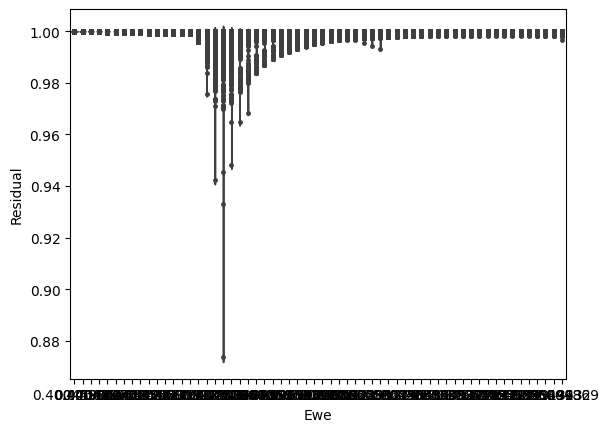

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = "100 cycles imped_RRCRCCPEModel_fit_log.csv"
df = pd.read_csv(filename)

param1 = "Ewe"
param2='Residual'

sns.violinplot(x=param1, y=param2, data=df, inner="point")

#grouped = df.groupby('Ewe').agg(
#        mean_param=pd.NamedAgg(column=param, aggfunc='mean'),
#        std_param=pd.NamedAgg(column=param, aggfunc='std')
#    ).reset_index()

In [3]:
df.keys()

Index(['Ewe', 'fmin', 'fmax', 'Initial_R0', 'Initial_R1', 'Initial_fs1',
       'Initial_n1', 'Initial_R2', 'Initial_fs2', 'Initial_n2', 'R0_bound_min',
       'R0_bound_max', 'R1_bound_min', 'R1_bound_max', 'fs1_bound_min',
       'fs1_bound_max', 'n1_bound_min', 'n1_bound_max', 'R2_bound_min',
       'R2_bound_max', 'fs2_bound_min', 'fs2_bound_max', 'n2_bound_min',
       'n2_bound_max', 'Fit_R0', 'Fit_R1', 'Fit_fs1', 'Fit_n1', 'Fit_R2',
       'Fit_fs2', 'Fit_n2', 'Residual'],
      dtype='object')

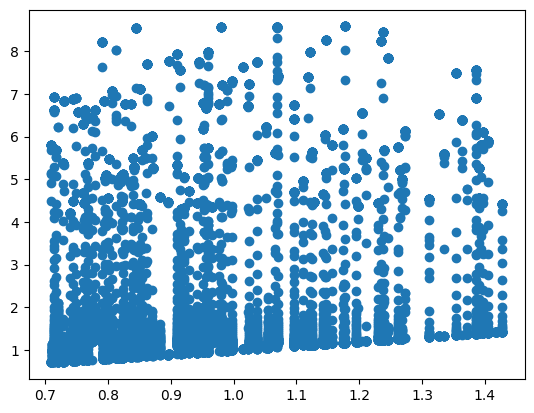

In [25]:
param1 = "R1_bound_min"
param2 = "Fit_R1"

plt.scatter(df[param1], df[param2])


Lower Bounds: [0, 0, 0, 0.6910271209661063, 2020072.0226445198, 511.6010781399384, 0.6993595328229025]
Upper Bounds: [17.49539252118801, 6.109790441389696, 385674.6047948878, 1.6910271209661063, 111358408.18870167, 512.6010781399384, 1.6993595328229025]
Lower Bounds: [2.053530844600651, 0, 0, 0.6537510246269265, 88075512.32664242, 0, 0.5196913403762282]
Upper Bounds: [7.989125751622819, 5.363028194522126, 5404621.922548592, 1.6537510246269265, 88075513.32664242, 914.8801940929543, 1.5196913403762282]
Lower Bounds: [10.434418722677277, 1.1434287768584577, 9550186.25964716, 0.35901307243368896, 18263855.46861452, 121.7071936011441, 0.6594279742069986]
Upper Bounds: [11.434418722677277, 4.15527826630324, 10385045.399737556, 1.5213102921423525, 68530578.31627375, 429.2032401533404, 1.6594279742069986]
Lower Bounds: [0, 0.8374348654191701, 0, 0.7388442444146437, 0, 918.9809213151668, 0.9393613138494564]
Upper Bounds: [6.4605306616289795, 3.2401862392156016, 11653862.929902978, 1.73884424441